In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv("independent.csv")
y = pd.read_csv("dependent.csv")
test = pd.read_csv("test.csv")

data = pd.concat([x,y['status_group']],axis=1)

### Exploratory Data Analysis

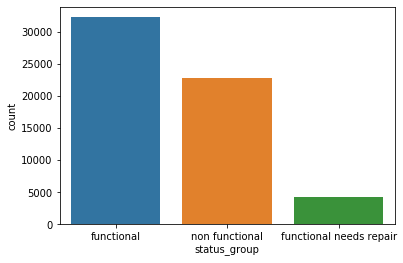

In [3]:
sns.countplot(data['status_group'])
plt.show()

In [4]:
data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


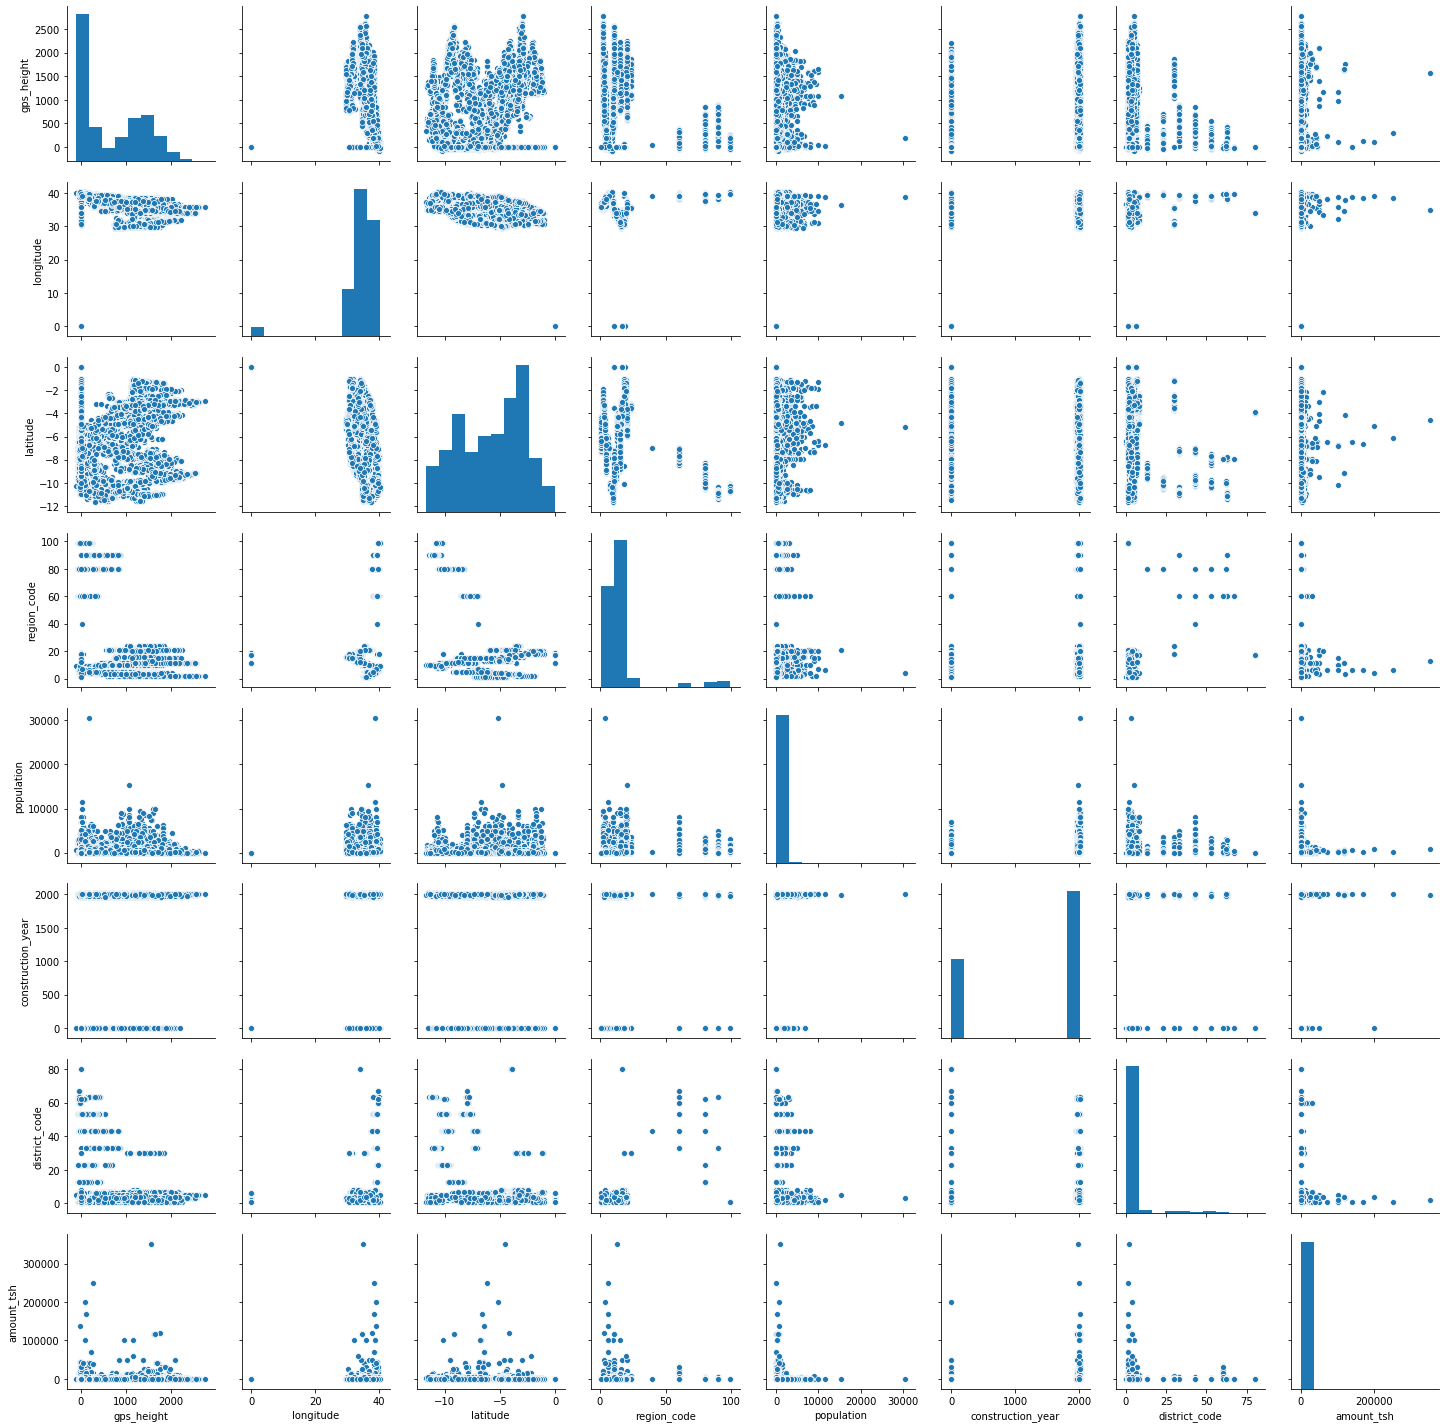

In [5]:
sns.pairplot(data[['gps_height','longitude','latitude','region_code','population','construction_year','district_code','amount_tsh']])
plt.show()

In [6]:
data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [7]:
data.select_dtypes(["object"]).nunique()

date_recorded              356
funder                    1897
installer                 2145
wpt_name                 37400
basin                        9
subvillage               19287
region                      21
lga                        125
ward                      2092
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64

#### Checking Correlated Categorical Features

###### Inspecting Payment

In [8]:
data["payment_type"].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [9]:
data["payment"].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

###### Inspecting Source

In [10]:
data["source"].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [11]:
data["source_type"].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [12]:
data["source_class"].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

###### Inspecting Extraction

In [13]:
data["extraction_type"].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [14]:
data["extraction_type_group"].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [15]:
data["extraction_type_class"].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

###### Inspecting Quality

In [16]:
data["water_quality"].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [17]:
data["quality_group"].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

###### Inspecting Quantity

In [18]:
data["quantity_group"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [19]:
data["quantity"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

###### Inspecting Water Point

In [20]:
data["waterpoint_type_group"].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [21]:
data["waterpoint_type"].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

###### Inspecting Management

In [22]:
data["management_group"].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [23]:
data["management"].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

###### Inspecting Other Categorical Columns 

In [24]:
data["num_private"].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [25]:
data["wpt_name"].value_counts()

none                     3563
Shuleni                  1748
Zahanati                  830
Msikitini                 535
Kanisani                  323
                         ... 
Kwa Dionisi Ngoli           1
Kwa Mzee Busumabu           1
Kwabena                     1
Kwajohnhela                 1
Kwa Selemani Ahsumani       1
Name: wpt_name, Length: 37400, dtype: int64

In [26]:
data["basin"].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

In [27]:
data["region_code"].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [28]:
data["district_code"].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [29]:
data["lga"].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

In [30]:
data["ward"].value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Themi          1
Korongoni      1
Uchindile      1
Mkumbi         1
Mitole         1
Name: ward, Length: 2092, dtype: int64

### Data Preprocessing & Feature Engineering

###### Dropping Columns with Missing Values which have less effect on predictions

In [31]:
data.drop(['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit'], axis=1, inplace=True)
test.drop(['funder', 'installer', 'subvillage', 'public_meeting', 'scheme_management', 'scheme_name', 'permit'], axis=1, inplace=True)

###### Dropping Categorical Columns with High Cardinality or having less effect on predictions

In [32]:
test_id = test['id'] # getting id column of test dataset for output csv file generation before dropping it
data.drop(['id', 'wpt_name', 'recorded_by', 'num_private', 'ward', 'lga'], axis=1, inplace=True)
test.drop(['id', 'wpt_name', 'recorded_by', 'num_private', 'ward', 'lga'], axis=1, inplace=True)

###### Dropping Correlated Categorical Columns Identified through above Inspections

In [33]:
data.drop(['quantity', 'quality_group', 'payment', 'source_type', 'source_class', 'extraction_type_class', 'extraction_type', 'waterpoint_type_group', 'management', 'region'], axis=1, inplace=True)
test.drop(['quantity', 'quality_group', 'payment', 'source_type', 'source_class', 'extraction_type_class', 'extraction_type', 'waterpoint_type_group', 'management', 'region'], axis=1, inplace=True)

###### Imputing 0's & negatives of construction_year, gps_height and Create new column year_recorded 

In [34]:
combined = [data,test]
for dataset in combined:
    # create new column year_recorded
    dataset['date_recorded'] = pd.to_datetime(dataset['date_recorded'], format="%Y-%m-%d")
    dataset['year_recorded'] = dataset['date_recorded'].dt.year
    dataset.drop(['date_recorded'], axis=1, inplace=True)
    
    # impute 0's of construction_year
    contruct_years = dataset['construction_year']!=0
    years_mean = int(dataset[contruct_years].loc[:,'construction_year'].mean())
    dataset.loc[dataset['construction_year']==0,'construction_year'] = years_mean
    
    # impute below 0 values of gps_height
    gps_heights = dataset['gps_height']>0
    height_mean = dataset[gps_heights].loc[:,'gps_height'].mean()
    dataset.loc[dataset['gps_height']<=0,'gps_height'] = height_mean

###### Feature Scaling

In [35]:
num_features = ['gps_height','longitude','latitude','region_code','population','construction_year','district_code','year_recorded','amount_tsh']

standardScaler = StandardScaler()

data[num_features] = standardScaler.fit_transform(data[num_features])
test[num_features] = standardScaler.fit_transform(test[num_features])

###### Encoding Categorical Features using Dummy Variables (One-Hot Encoding)

In [36]:
features = ['basin','extraction_type_group','management_group','payment_type','water_quality','quantity_group','source','waterpoint_type']

# Creating Dummies for the ctegorical features
data_dum = pd.get_dummies(data[features])
test_dum = pd.get_dummies(test[features])

# Dummy Trapping
data_dum.drop(['basin_Internal','extraction_type_group_afridev','management_group_commercial','payment_type_annually','water_quality_coloured','quantity_group_dry','source_dam','waterpoint_type_cattle trough'],axis=1,inplace=True)
test_dum.drop(['basin_Internal','extraction_type_group_afridev','management_group_commercial','payment_type_annually','water_quality_coloured','quantity_group_dry','source_dam','waterpoint_type_cattle trough'],axis=1,inplace=True)

# Dropping Original Columns
data.drop(features,axis=1,inplace=True)
test.drop(features,axis=1,inplace=True)

# Combining one-hot encoded columns with other columns
data_new = pd.concat([data,data_dum],axis=1)
test_new = pd.concat([test,test_dum],axis=1)

###### Label Encoding Response Variable 

In [37]:
le = LabelEncoder()
data_new['status_group'] = le.fit_transform(data_new['status_group'])
y_new = data_new['status_group']
data_new.drop(['status_group'],axis=1,inplace=True)

### Model Training & Testing 

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data_new,y_new,test_size=0.2,random_state=1)

###### Hyperparameter Optimization 

In [ ]:
tuneModel=RandomForestClassifier()
params={"random_state":[0,1,10,20], "n_estimators":[100,150,200,250,300,500],"max_depth":[15,20,25,30,40,45]}
cval=KFold(n_splits=5)
gsearch=GridSearchCV(tuneModel,params,cv=cval)
grid_results=gsearch.fit(x_train,y_train)
grid_results.best_params_

###### Training 

In [39]:
model = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=1)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=500, random_state=1)

In [40]:
predictions = model.predict(x_test)

###### Checking Results 

In [41]:
accuracy_score(y_test, predictions)

0.811952861952862

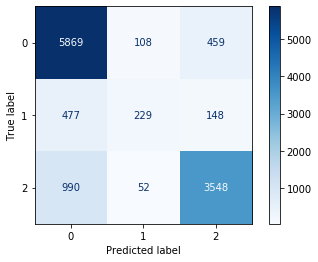

In [42]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)
plt.show()

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      6436
           1       0.59      0.27      0.37       854
           2       0.85      0.77      0.81      4590

    accuracy                           0.81     11880
   macro avg       0.75      0.65      0.68     11880
weighted avg       0.81      0.81      0.80     11880



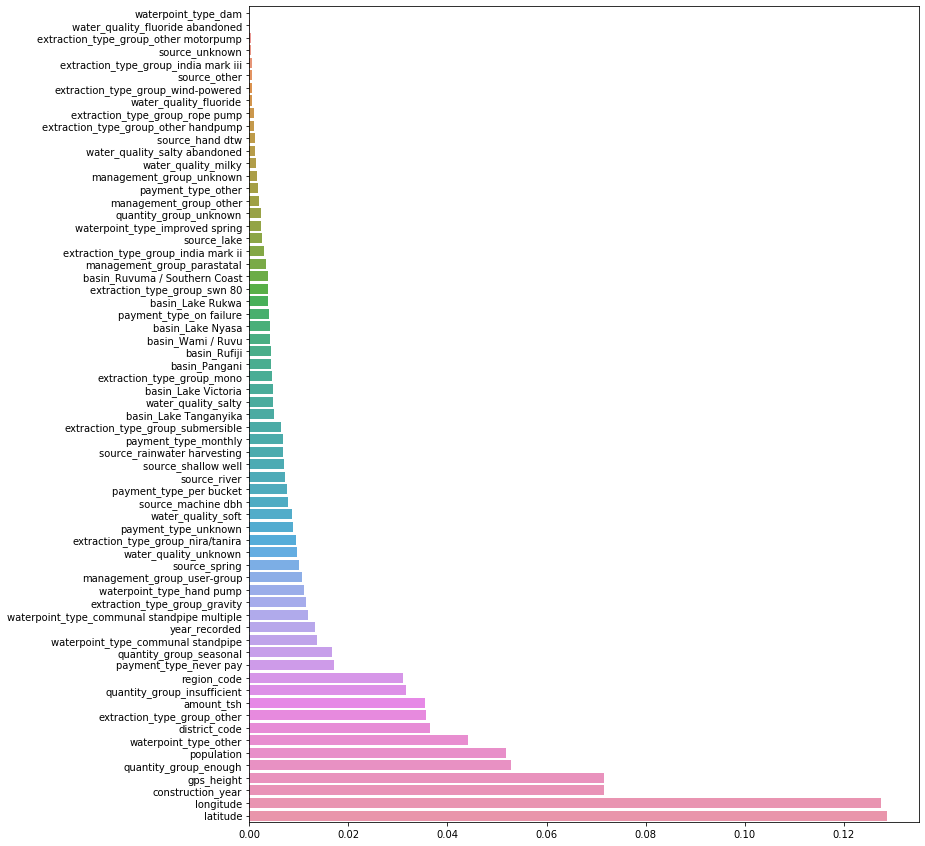

In [44]:
plt.figure(figsize=(12,15))
idx=np.argsort(model.feature_importances_)
sns.barplot(x=model.feature_importances_[idx],y=data_new.columns[idx])
plt.show()

###### Predictions for Submission 

In [625]:
test_preds = model.predict(test_new)

submissions = ["functional" if i==0 else "functional needs repair" if i==1 else "non functional" for i in test_preds]

In [626]:
output = pd.DataFrame({'id': test_id, 'status_group': submissions})
output.to_csv('./submissions/my_submission.csv', index=False)